In [110]:
import pandas as pd
import seaborn as sns
import random as rd
import numpy as np
import cmath as c
import statistics as st
import matplotlib.pyplot as plt
numbers_csv=pd.read_csv("Liczby.csv")

In [114]:
def shuffle(list1):
    list = rd.sample(list1, len(list1))
    return list


def maxImin( list, kon):
    # list = rd.sample(list1, len(list1))
    maxlist = [[] for _ in range(kon-1)]
    minList = [[] for _ in range(kon-1)]
    for i in range(kon-1):
        if isinstance(list[0][i], (int, float)):
            maxlist[i].append(list[0][i])
            minList[i].append(list[0][i])

    for i in range(len(list)):
            for j in range(kon-1):
                if isinstance(list[i][j], (int, float)):
                    
                    
                    if list[i][j] > maxlist[j][-1]:
                        maxlist[j][-1] = list[i][j]
                    if list[i][j] < minList[j][-1]:
                        minList[j][-1] = list[i][j]
    
    for i in range(len(list)):
            for j in range(kon-1):
                if isinstance(list[i][j], (int, float)):
                    if maxlist[j][-1] != minList[j][-1]:
                        list[i][j] = (list[i][j] - minList[j][-1]) / (maxlist[j][-1] - minList[j][-1])
                    else:
                        list[i][j] = 0  
                #print (list[i][j])
    # print(list)
    return(list) 


def knn(tabPos,tabOdw,tabOdl,cz1,cz2,k,pozycjaNAzwy,ile,ilePraw,ilenie):
    
    for i in range(ile):
        x=tabOdl.index(tabPos[i]) 
        tabOdw[k].append(cz1[x][pozycjaNAzwy])     
    licznik = {}
#gLosowanie
    for element in tabOdw[k]:
        li=element.astype(str)
        if li in licznik:
             licznik[li] += 1
        else:
             licznik[li] = str(tabOdw[k]).count(li)
    maks=0
    # remis=False
    najel=""
    tab=[]
 
    # zliczanie głosów
    for element in licznik:
        if int(licznik[element])>int(maks):
            najel=element
    tab.append(najel)
    licz=0
    # zapobieganie remisowi
    for element in licznik:
        if int(licznik[element])==int(maks):
            licz+=1
            if licz>1:
                tab.append(element)     
    # print(najel)    
    najel=rd.choice(tab)   
    # testowanie
    # print(najel,"dupa")
    # print(str(cz2[k][pozycjaNAzwy]),"==")
    if najel==str(cz2[k][pozycjaNAzwy]):
        ilePraw+=1;     
        # print(ilePraw)
    else:
        ilenie+=1 
    # print(ilePraw/(ilenie+ilePraw))        
    return (ilePraw,ilenie)
def krytMinkowski(normList,m,ile,pozycjaNAzwy):
    ilePraw=0
    ilenie=0
    lng=len(normList)
    lng1=round(lng*0.7)
    lng2=lng-lng1
    cz1=normList[:lng1]
    cz2=normList[lng1:]
    # print(cz1)
    tabOdl=[[] for _ in range(len(cz1))]
    tabPos=[[] for _ in range(len(cz1))]
    tabOdw=[[] for _ in range(len(cz1))]
    lng2=len(cz2)-1
    for k in range(lng2):
        # print(k)
        for i in range(len(cz1)):
            sum=0
            for j in range(len(cz1[0])):
                
                if isinstance(cz1[i][j], (int, float)):
                    a=cz1[i][j]
                    # print("cz1 ",cz1[i][j])
                    
                    b=cz2[k][j]
                    # print("a= ",float(a))
                    # print("b= ",float(b))
                    sum+=abs(cz1[i][j]-cz2[k][j])**m

                    # print("huj",sum)
            sum=sum**(1.0/m)
            # print(sum)
            # sum=np.power(sum,1.0/m)
            
            tabOdl[i]=sum
            tabPos[i]=sum

        #koniec minkowskiego    
        # print(tabOdl)
        # print(len(tabOdl))
        tabPos.sort()
        # print(tabPos[1])
        ilePraw, ilenie=knn(tabPos,tabOdw,tabOdl,cz1,cz2,k,pozycjaNAzwy,ile,ilePraw,ilenie)
    return (ilePraw/(ilenie+ilePraw))

In [ ]:
df_num=pd.read_csv("Liczby.csv")
lst1=[]

csv1=open("Wynki.csv","w+")
i=0
for i in range(len(df_num)-1):
    lst=df_num.loc[i]

    lst1.append(lst)
lst2=[]
# print(lst1)

 




ln=len(lst1[0]) 
print(lst1[0][0])
lsta=maxImin(lst1,ln) 
lsta=shuffle(lsta) 
nr=2
k=3
# print(lsta[0])
print("a")
csv1.write("k,m,wart\n")
for i in range(1,5):
    lsta=shuffle(lsta) 
    
    for k in range(1,5):
        for nr in range(1,5):
            wrt=krytMinkowski(lsta,nr,3,ln-1)
            print(f"wrt={wrt},k={k},m={nr}\n")
            zm=f"{k},"+f"{nr},"+f"{wrt}"
            print(zm)
            csv1.write(str(k))
            csv1.write(",")
            csv1.write(str(nr))
            csv1.write(",")
            csv1.write(str(wrt))
            csv1.write("\n")
            
            
            

In [103]:
#https://www.kaggle.com/code/hosammhmdali/digit-recognizer-cnn-98-25-accuracy to jest o cnn - convolution neural network

df_num=munbers_csv.copy()

#labels = csv.pop('label')
#labels.head()

0 ilość:  5923
1 ilość:  6742
2 ilość:  5958
3 ilość:  6131
4 ilość:  5842
5 ilość:  5421
6 ilość:  5918
7 ilość:  6265
8 ilość:  5851
9 ilość:  5949


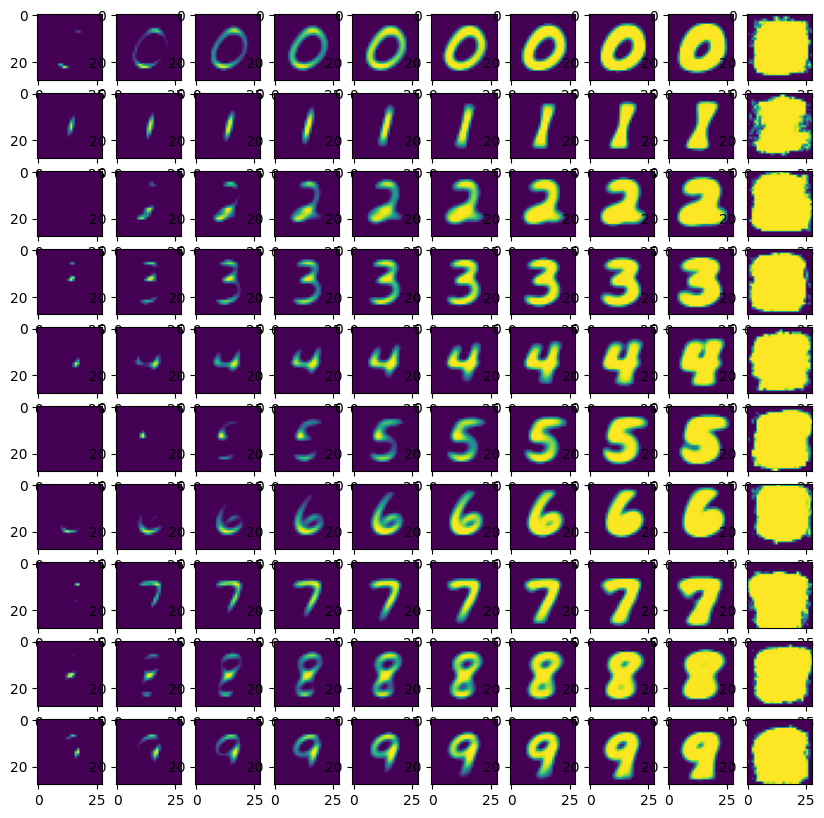

In [106]:
# "idealnie uśrednione liczby" i ich reprezentacja graficzna
def scale(x):
    return x.astype('float32')/255.0


def prep(x):
    x=scale(x)
    x=x.values.reshape(-1,28,28,1)
    return x


avg_numbers=[]
for num in range(10):
    for percentages in range(10,101,10):
        number =df_num.loc[df_num['label']==num].copy()
        
        number.pop('label')
        avg_number=[]
        for i in range(784):
            avg_number.append( number[f"{i}"].quantile(percentages/100))
    
        avg_numbers.append(avg_number)
    print(num,"ilość: ",len(number))
    
avg_numbers_df=pd.DataFrame(avg_numbers)
digits = prep(avg_numbers_df)

fig,axes = plt.subplots(10,10,figsize=(10,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(digits[i])


In [163]:
csv= numbers_csv.copy()
def shuffle(df):
    df=df.sample(frac=1).reset_index(drop=True)
    return df


def split(df, ratio):
    lengh = len(df)
    part =int(lengh*ratio)
    p1=df.iloc[0:part]
    p2=df.iloc[4200:lengh]
    return p1,p2
    
  
def MaxMin(df_min_max_scaled):
    for column in df_min_max_scaled.columns:
        if column=='label':
            return df_min_max_scaled
        else:
            min= df_min_max_scaled[column].min()
            max=df_min_max_scaled[column].max()
            if max!=0:
                x_min =df_min_max_scaled[column] - df_min_max_scaled[column].min()
                max_min=(max-min)
                df_min_max_scaled[column]=(x_min/max_min)
    

MaxMin(csv)
csv = shuffle(csv)
csv.head()
treningowy, walidacyjny=split(csv,0.7)





,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
count,55800.0,55800.0,55800.0,55800.0,55800.0,55800.0,55800.0,55800.0,55800.0,55800.0,...,55800.000000,55800.000000,55800.000000,55800.000000,55800.000000,55800.0,55800.0,55800.0,55800.0,55800.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000326,0.000153,0.000069,0.000062,0.000035,0.0,0.0,0.0,0.0,4.451774
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014885,0.010094,0.006247,0.006842,0.005797,0.0,0.0,0.0,0.0,2.893128
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,9.000000
